importing required libraries 

In [ ]:
# if the scikit-multilearn not installed run this cell 
!pip install scikit-multilearn
# most of the datasets in Weka Arff format for this installed this library 
!pip install arff
import numpy as np

     |████████████████████████████████| 92kB 4.5MB/s 
  Created wheel for arff: filename=arff-0.9-cp36-none-any.whl size=4969 sha256=f95b41d0151ce451d7ab3f8553a41974894e93a144808f35144558916ad9e444
  Stored in directory: /root/.cache/pip/wheels/04/d0/70/2c73afedd3ac25c6085b528742c69b9587cbdfa67e5194583b
Successfully built arff


Created 03 arrays of each measuring metrics for 03 classifier

In [ ]:
#03 classifiers hamming loss list 
hamming_loss_MLTSVM=[]
hamming_loss_MLKNN=[]
hamming_loss_BRKNNa=[]
#03 classifier accuracy list
accuracy_MLTSVM=[]
accuracy_MLKNN=[]
accuracy_BRKNNa=[]
#03 classifier precision list
precision_MLTSVM=[]
precision_MLKNN=[]
precision_BRKNNa=[]
#03 classifier recall list
recall_MLTSVM=[]
recall_MLKNN=[]
recall_BRKNNa=[]
#03 classifier f1 measure list
f1_measure_MLTSVM=[]
f1_measure_MLKNN=[]
f1_measure_BRKNNa=[]

#01 Medical Dataset

Load Dataset

In [ ]:
from skmultilearn.dataset import load_dataset
x1,y1, _, _ = load_dataset('medical', 'undivided')
x1.shape,y1.shape

medical:undivided - does not exists downloading
Downloaded medical-undivided


((978, 1449), (978, 45))

Train and Test split

In [ ]:
from skmultilearn.model_selection import iterative_train_test_split 
x1_train, y1_train, x1_test, y1_test = iterative_train_test_split(x1, y1, test_size = 0.3)
print(x1_train.shape, x1_test.shape, y1_train.shape, y1_test.shape)

(685, 1449) (293, 1449) (685, 45) (293, 45)


In [ ]:
from scipy import sparse as s
x1_s_train = s.csr_matrix(x1_train)
y1_s_train = s.csr_matrix(y1_train)
x1_s_test = s.csr_matrix(x1_test)
y1_s_test = s.csr_matrix(y1_test)

## MLTSVM 

In [ ]:
from skmultilearn.adapt import MLTSVM
classifier1 = MLTSVM(max_iteration=1000,c_k=2**-6)
# train
classifier1.fit(x1_s_train, y1_s_train)
# predict
MLTSVM1_predictions = classifier1.predict(x1_s_test)

## MLKNN

In [ ]:
from skmultilearn.adapt import MLkNN
#MLKNN is an adaptation of the kNN lazy learning algorithm for multi-label data.
# apply MLkNN for medical dataset it has 45 labels. 
classifier1 = MLkNN(k=45)
# train
classifier1.fit(x1_s_train, y1_s_train)
# predict
MLKNN1_predictions = classifier1.predict(x1_s_test)

## BRKNNa

In [ ]:
from skmultilearn.adapt import BRkNNaClassifier
classifier1 = BRkNNaClassifier(k=45)
# train
classifier1.fit(x1_s_train, y1_s_train)
# predict
BR1_predictions = classifier1.predict(x1_s_test)

## Measuring Metrics 

In [ ]:
import sklearn.metrics as m
#Hamming Loss
hamming_loss_MLTSVM.append(round(m.hamming_loss(y1_s_test, MLTSVM1_predictions),2))
hamming_loss_MLKNN.append(round(m.hamming_loss(y1_s_test, MLKNN1_predictions),2))
hamming_loss_BRKNNa.append(round(m.hamming_loss(y1_s_test, BR1_predictions),2))

#Accuracy
accuracy_MLTSVM.append(round(m.accuracy_score(y1_s_test, MLTSVM1_predictions),2))
accuracy_MLKNN.append(round(m.accuracy_score(y1_s_test, MLKNN1_predictions),2))
accuracy_BRKNNa.append(round(m.accuracy_score(y1_s_test, BR1_predictions),2))

#Micro Precision
precision_MLTSVM.append(round(m.precision_score(y1_s_test, MLTSVM1_predictions, average='micro', zero_division='warn'),2))
precision_MLKNN.append(round(m.precision_score(y1_s_test, MLKNN1_predictions, average='micro', zero_division='warn'),2))
precision_BRKNNa.append(round(m.precision_score(y1_s_test, BR1_predictions, average='micro', zero_division='warn'),2))

#Micro Recall
recall_MLTSVM.append(round(m.recall_score(y1_s_test, MLTSVM1_predictions, average='micro',zero_division='warn'),2))
recall_MLKNN.append(round(m.recall_score(y1_s_test, MLKNN1_predictions, average='micro',zero_division='warn'),2))
recall_BRKNNa.append(round(m.recall_score(y1_s_test, BR1_predictions, average='micro',zero_division='warn'),2))
#Micro F1 measure
f1_measure_MLTSVM.append(round(m.f1_score(y1_s_test, MLTSVM1_predictions, average='micro',zero_division='warn'),2))
f1_measure_MLKNN.append(round(m.f1_score(y1_s_test, MLKNN1_predictions, average='micro',zero_division='warn'),2))
f1_measure_BRKNNa.append(round(m.f1_score(y1_s_test, BR1_predictions, average='micro',zero_division='warn'),2))

In [ ]:
print("------------------------------")
print("\t(Examples,Labels)")
print("------------------------------")
print("MLTSVM -> ",MLTSVM1_predictions.shape)
print("MLKNN  -> ",MLKNN1_predictions.shape)
print("BRKNNa -> ",BR1_predictions.shape)
import sklearn.metrics as m
print("------------------------------")
print("\tHamming Loss")
print("------------------------------")
print("MLTSVM -> ",round(m.hamming_loss(y1_s_test, MLTSVM1_predictions),2))
print("MLKNN  -> ",round(m.hamming_loss(y1_s_test, MLKNN1_predictions),2))
print("BRKNNa -> ",round(m.hamming_loss(y1_s_test, BR1_predictions),2))
print("------------------------------")
print("\tAccuracy")
print("------------------------------")
print("MLTSVM -> ",round(m.accuracy_score(y1_s_test, MLTSVM1_predictions),2))
print("MLKNN  -> ",round(m.accuracy_score(y1_s_test, MLKNN1_predictions),2))
print("BRKNNa -> ",round(m.accuracy_score(y1_s_test, BR1_predictions),2))
print("------------------------------")
print("\tPrecision")
print("------------------------------")
print("MLTSVM -> ",round(m.precision_score(y1_s_test, MLTSVM1_predictions, average='micro', zero_division='warn'),2))
print("MLKNN -> ",round(m.precision_score(y1_s_test, MLKNN1_predictions, average='micro', zero_division='warn'),2))
print("BRKNNa -> ",round(m.precision_score(y1_s_test, BR1_predictions, average='micro', zero_division='warn'),2))
print("------------------------------")
print("\tRecall")
print("------------------------------")
print("MLTSVM -> ",round(m.recall_score(y1_s_test, MLTSVM1_predictions, average='micro',zero_division='warn'),2))
print("MLTSVM -> ",round(m.recall_score(y1_s_test, MLKNN1_predictions, average='micro',zero_division='warn'),2))
print("MLTSVM -> ",round(m.recall_score(y1_s_test, BR1_predictions, average='micro',zero_division='warn'),2))
print("------------------------------")
print("\tF1-measure")
print("------------------------------")
#f1=2*(p*r)/(p+r)
print("MLTSVM -> ",round(m.f1_score(y1_s_test, MLTSVM1_predictions, average='micro',zero_division='warn'),2))
print("MLTSVM -> ",round(m.f1_score(y1_s_test, MLKNN1_predictions, average='micro',zero_division='warn'),2))
print("MLTSVM -> ",round(m.f1_score(y1_s_test, BR1_predictions, average='micro',zero_division='warn'),2))
print()

------------------------------
	(Examples,Labels)
------------------------------
MLTSVM ->  (293, 45)
MLKNN  ->  (293, 45)
BRKNNa ->  (293, 45)
------------------------------
	Hamming Loss
------------------------------
MLTSVM ->  0.02
MLKNN  ->  0.02
BRKNNa ->  0.02
------------------------------
	Accuracy
------------------------------
MLTSVM ->  0.47
MLKNN  ->  0.44
BRKNNa ->  0.27
------------------------------
	Precision
------------------------------
MLTSVM ->  0.76
MLKNN ->  0.86
BRKNNa ->  0.84
------------------------------
	Recall
------------------------------
MLTSVM ->  0.65
MLTSVM ->  0.51
MLTSVM ->  0.31
------------------------------
	F1-measure
------------------------------
MLTSVM ->  0.7
MLTSVM ->  0.64
MLTSVM ->  0.46



#02 Enron Dataset

In [ ]:
from skmultilearn.dataset import load_dataset
x2,y2, _, _ = load_dataset('enron', 'undivided')
x2.shape, y2.shape

enron:undivided - does not exists downloading
Downloaded enron-undivided


((1702, 1001), (1702, 53))

In [ ]:
#from skmultilearn.model_selection import iterative_train_test_split
x2_train, y2_train, x2_test, y2_test = iterative_train_test_split(x2, y2, test_size = 0.3)
print(x2_train.shape, x2_test.shape, y2_train.shape, y2_test.shape)

(1178, 1001) (524, 1001) (1178, 53) (524, 53)


In [ ]:
#from scipy import sparse as s
x2_s_train = s.csr_matrix(x2_train)
y2_s_train = s.csr_matrix(y2_train)
x2_s_test = s.csr_matrix(x2_test)
y2_s_test = s.csr_matrix(y2_test)

## MLTSVM

In [ ]:
#from skmultilearn.adapt import MLTSVM
classifier2 = MLTSVM(c_k =2**-6)
# train
classifier2.fit(x2_s_train, y2_s_train)
# predict
MLTSVM2_predictions = classifier2.predict(x2_s_test)

## MLKNN

In [ ]:
#from skmultilearn.adapt import MLkNN
#MLKNN is an adaptation of the kNN lazy learning algorithm for multi-label data.
# apply MLkNN for enron dataset it has 53 labels. 
classifier2 = MLkNN(k=53)

# train
classifier2.fit(x2_s_train, y2_s_train)

# predict
MLKNN2_predictions = classifier2.predict(x2_s_test)

##BRKNNa

In [ ]:
from skmultilearn.adapt import BRkNNaClassifier
classifier2 = BRkNNaClassifier(k=53)
# train
classifier2.fit(x2_s_train, y2_s_train)
# predict
BR2_predictions = classifier2.predict(x2_s_test)

##Measuring Metrics

In [ ]:
import sklearn.metrics as m
#Hamming Loss
hamming_loss_MLTSVM.append(round(m.hamming_loss(y2_s_test, MLTSVM2_predictions),2))
hamming_loss_MLKNN.append(round(m.hamming_loss(y2_s_test, MLKNN2_predictions),2))
hamming_loss_BRKNNa.append(round(m.hamming_loss(y2_s_test, BR2_predictions),2))

#Accuracy
accuracy_MLTSVM.append(round(m.accuracy_score(y2_s_test, MLTSVM2_predictions),2))
accuracy_MLKNN.append(round(m.accuracy_score(y2_s_test, MLKNN2_predictions),2))
accuracy_BRKNNa.append(round(m.accuracy_score(y2_s_test, BR2_predictions),2))

#Micro Precision
precision_MLTSVM.append(round(m.precision_score(y2_s_test, MLTSVM2_predictions, average='micro', zero_division='warn'),2))
precision_MLKNN.append(round(m.precision_score(y2_s_test, MLKNN2_predictions, average='micro', zero_division='warn'),2))
precision_BRKNNa.append(round(m.precision_score(y2_s_test, BR2_predictions, average='micro', zero_division='warn'),2))

#Micro Recall
recall_MLTSVM.append(round(m.recall_score(y2_s_test, MLTSVM2_predictions, average='micro',zero_division='warn'),2))
recall_MLKNN.append(round(m.recall_score(y2_s_test, MLKNN2_predictions, average='micro',zero_division='warn'),2))
recall_BRKNNa.append(round(m.recall_score(y2_s_test, BR2_predictions, average='micro',zero_division='warn'),2))
#Micro F1 measure
f1_measure_MLTSVM.append(round(m.f1_score(y2_s_test, MLTSVM2_predictions, average='micro',zero_division='warn'),2))
f1_measure_MLKNN.append(round(m.f1_score(y2_s_test, MLKNN2_predictions, average='micro',zero_division='warn'),2))
f1_measure_BRKNNa.append(round(m.f1_score(y2_s_test, BR2_predictions, average='micro',zero_division='warn'),2))

In [ ]:
print("------------------------------")
print("\t(Examples,Labels")
print("------------------------------")
print("MLTSVM -> ",MLTSVM2_predictions.shape)
print("MLKNN  -> ",MLKNN2_predictions.shape)
print("BRKNNa -> ",BR2_predictions.shape)
import sklearn.metrics as m
print("------------------------------")
print("\tHamming Loss")
print("------------------------------")
print("MLTSVM -> ",round(m.hamming_loss(y2_s_test, MLTSVM2_predictions),2))
print("MLKNN  -> ",round(m.hamming_loss(y2_s_test, MLKNN2_predictions),2))
print("BRKNNa -> ",round(m.hamming_loss(y2_s_test, BR2_predictions),2))
print("------------------------------")
print("\tAccuracy")
print("------------------------------")
print("MLTSVM -> ",round(m.accuracy_score(y2_s_test, MLTSVM2_predictions),2))
print("MLKNN  -> ",round(m.accuracy_score(y2_s_test, MLKNN2_predictions),2))
print("BRKNNa -> ",round(m.accuracy_score(y2_s_test, BR2_predictions),2))
print("------------------------------")
print("\tPrecision")
print("------------------------------")
print("MLTSVM -> ",round(m.precision_score(y2_s_test, MLTSVM2_predictions, average='micro',zero_division='warn'),2))
print("MLKNN -> ",round(m.precision_score(y2_s_test, MLKNN2_predictions, average='micro',zero_division='warn'),2))
print("BRKNNa -> ",round(m.precision_score(y2_s_test, BR2_predictions, average='micro',zero_division='warn'),2))
print("------------------------------")
print("\tRecall")
print("------------------------------")
print("MLTSVM -> ",round(m.recall_score(y2_s_test, MLTSVM2_predictions, average='micro',zero_division='warn'),2))
print("MLKNN -> ",round(m.recall_score(y2_s_test, MLKNN2_predictions, average='micro',zero_division='warn'),2))
print("BRKNNa -> ",round(m.recall_score(y2_s_test, BR2_predictions, average='micro',zero_division='warn'),2))
print("------------------------------")
print("\tF1-measure")
print("------------------------------")
#f1=2*(p*r)/(p+r)
print("MLTSVM -> ",round(m.f1_score(y2_s_test, MLTSVM2_predictions, average='micro',zero_division='warn'),2))
print("MLKNN -> ",round(m.f1_score(y2_s_test, MLKNN2_predictions, average='micro',zero_division='warn'),2))
print("BRKNNa -> ",round(m.f1_score(y2_s_test, BR2_predictions, average='micro',zero_division='warn'),2))
print()

------------------------------
	(Examples,Labels
------------------------------
MLTSVM ->  (524, 53)
MLKNN  ->  (524, 53)
BRKNNa ->  (524, 53)
------------------------------
	Hamming Loss
------------------------------
MLTSVM ->  0.06
MLKNN  ->  0.05
BRKNNa ->  0.06
------------------------------
	Accuracy
------------------------------
MLTSVM ->  0.06
MLKNN  ->  0.05
BRKNNa ->  0.06
------------------------------
	Precision
------------------------------
MLTSVM ->  0.56
MLKNN ->  0.63
BRKNNa ->  0.52
------------------------------
	Recall
------------------------------
MLTSVM ->  0.37
MLKNN ->  0.35
BRKNNa ->  0.12
------------------------------
	F1-measure
------------------------------
MLTSVM ->  0.44
MLKNN ->  0.45
BRKNNa ->  0.2



#03 Scene Dataset

Load Dataset

In [ ]:
#from skmultilearn.dataset import load_dataset
x3,y3, _, _ = load_dataset('scene', 'undivided')
x3.shape,y3.shape

scene:undivided - does not exists downloading
Downloaded scene-undivided


((2407, 294), (2407, 6))

Train and Test split

In [ ]:
#from skmultilearn.model_selection import iterative_train_test_split
x3_train, y3_train, x3_test, y3_test = iterative_train_test_split(x3, y3, test_size = 0.3)
print(x3_train.shape, x3_test.shape, y3_train.shape, y3_test.shape)

(1685, 294) (722, 294) (1685, 6) (722, 6)


In [ ]:
#from scipy import sparse as s
x3_s_train = s.csr_matrix(x3_train)
y3_s_train = s.csr_matrix(y3_train)
x3_s_test = s.csr_matrix(x3_test)
y3_s_test = s.csr_matrix(y3_test)

##MLTSVM

In [ ]:
#from skmultilearn.adapt import MLTSVM
classifier3 = MLTSVM(c_k =2**-6)
# train
classifier3.fit(x3_s_train, y3_s_train)
# predict
MLTSVM3_predictions = classifier3.predict(x3_s_test)

##MLKNN

In [ ]:
#from skmultilearn.adapt import MLkNN
#MLKNN is an adaptation of the kNN lazy learning algorithm for multi-label data.
# apply MLkNN for Scene dataset it has 6 labels. 
classifier3 = MLkNN(k=6)

# train
classifier3.fit(x3_s_train, y3_s_train)

# predict
MLKNN3_predictions = classifier3.predict(x3_s_test)

## BRKNNa

In [ ]:
from skmultilearn.adapt import BRkNNaClassifier
classifier3 = BRkNNaClassifier(k=6)
# train
classifier3.fit(x3_s_train, y3_s_train)
# predict
BR3_predictions = classifier3.predict(x3_s_test)

##Measuring Metrics 

In [ ]:
import sklearn.metrics as m
#Hamming Loss
hamming_loss_MLTSVM.append(round(m.hamming_loss(y3_s_test, MLTSVM3_predictions),2))
hamming_loss_MLKNN.append(round(m.hamming_loss(y3_s_test, MLKNN3_predictions),2))
hamming_loss_BRKNNa.append(round(m.hamming_loss(y3_s_test, BR3_predictions),2))

#Accuracy
accuracy_MLTSVM.append(round(m.accuracy_score(y3_s_test, MLTSVM3_predictions),2))
accuracy_MLKNN.append(round(m.accuracy_score(y3_s_test, MLKNN3_predictions),2))
accuracy_BRKNNa.append(round(m.accuracy_score(y3_s_test, BR3_predictions),2))

#Micro Precision
precision_MLTSVM.append(round(m.precision_score(y3_s_test, MLTSVM3_predictions, average='micro', zero_division='warn'),2))
precision_MLKNN.append(round(m.precision_score(y3_s_test, MLKNN3_predictions, average='micro', zero_division='warn'),2))
precision_BRKNNa.append(round(m.precision_score(y3_s_test, BR3_predictions, average='micro', zero_division='warn'),2))

#Micro Recall
recall_MLTSVM.append(round(m.recall_score(y3_s_test, MLTSVM3_predictions, average='micro',zero_division='warn'),2))
recall_MLKNN.append(round(m.recall_score(y3_s_test, MLKNN3_predictions, average='micro',zero_division='warn'),2))
recall_BRKNNa.append(round(m.recall_score(y3_s_test, BR3_predictions, average='micro',zero_division='warn'),2))
#Micro F1 measure
f1_measure_MLTSVM.append(round(m.f1_score(y3_s_test, MLTSVM3_predictions, average='micro',zero_division='warn'),2))
f1_measure_MLKNN.append(round(m.f1_score(y3_s_test, MLKNN3_predictions, average='micro',zero_division='warn'),2))
f1_measure_BRKNNa.append(round(m.f1_score(y3_s_test, BR3_predictions, average='micro',zero_division='warn'),2))

In [ ]:
print("------------------------------")
print("\t(Examples,Labels")
print("------------------------------")
print("MLTSVM -> ",MLTSVM3_predictions.shape)
print("MLKNN  -> ",MLKNN3_predictions.shape)
print("BRKNNa -> ",BR3_predictions.shape)
import sklearn.metrics as m
print("------------------------------")
print("\tHamming Loss")
print("------------------------------")
print("MLTSVM -> ",round(m.hamming_loss(y3_s_test, MLTSVM3_predictions),2))
print("MLKNN  -> ",round(m.hamming_loss(y3_s_test, MLKNN3_predictions),2))
print("BRKNNa -> ",round(m.hamming_loss(y3_s_test, BR3_predictions),2))
print("------------------------------")
print("\tAccuracy")
print("------------------------------")
print("MLTSVM -> ",round(m.accuracy_score(y3_s_test, MLTSVM3_predictions),2))
print("MLKNN  -> ",round(m.accuracy_score(y3_s_test, MLKNN3_predictions),2))
print("BRKNNa -> ",round(m.accuracy_score(y3_s_test, BR3_predictions),2))
print("------------------------------")
print("\tPrecision")
print("------------------------------")
print("MLTSVM -> ",round(m.precision_score(y3_s_test, MLTSVM3_predictions, average='micro',zero_division='warn'),2))
print("MLKNN -> ",round(m.precision_score(y3_s_test, MLKNN3_predictions, average='micro',zero_division='warn'),2))
print("BRKNNa -> ",round(m.precision_score(y3_s_test, BR3_predictions, average='micro',zero_division='warn'),2))
print("------------------------------")
print("\tRecall")
print("------------------------------")
print("MLTSVM -> ",round(m.recall_score(y3_s_test, MLTSVM3_predictions, average='micro',zero_division='warn'),2))
print("MLKNN -> ",round(m.recall_score(y3_s_test, MLKNN3_predictions, average='micro',zero_division='warn'),2))
print("BRKNNa -> ",round(m.recall_score(y3_s_test, BR3_predictions, average='micro',zero_division='warn'),2))
print("------------------------------")
print("\tF1-measure")
print("------------------------------")
#f1=2*(p*r)/(p+r)
print("MLTSVM -> ",round(m.f1_score(y3_s_test, MLTSVM3_predictions, average='micro',zero_division='warn'),2))
print("MLKNN -> ",round(m.f1_score(y3_s_test, MLKNN3_predictions, average='micro',zero_division='warn'),2))
print("BRKNNa -> ",round(m.f1_score(y3_s_test, BR3_predictions, average='micro',zero_division='warn'),2))
print()

------------------------------
	(Examples,Labels
------------------------------
MLTSVM ->  (722, 6)
MLKNN  ->  (722, 6)
BRKNNa ->  (722, 6)
------------------------------
	Hamming Loss
------------------------------
MLTSVM ->  0.61
MLKNN  ->  0.1
BRKNNa ->  0.1
------------------------------
	Accuracy
------------------------------
MLTSVM ->  0.01
MLKNN  ->  0.62
BRKNNa ->  0.57
------------------------------
	Precision
------------------------------
MLTSVM ->  0.22
MLKNN ->  0.75
BRKNNa ->  0.82
------------------------------
	Recall
------------------------------
MLTSVM ->  0.99
MLKNN ->  0.69
BRKNNa ->  0.58
------------------------------
	F1-measure
------------------------------
MLTSVM ->  0.37
MLKNN ->  0.72
BRKNNa ->  0.68



#04 Emotions Dataset

Load Dataset

In [ ]:
from skmultilearn.dataset import load_dataset
x4,y4, _, _ = load_dataset('emotions', 'undivided')

emotions:undivided - does not exists downloading
Downloaded emotions-undivided


Train and Test split

In [ ]:
#from skmultilearn.model_selection import iterative_train_test_split
x4_train, y4_train, x4_test, y4_test = iterative_train_test_split(x4, y4, test_size = 0.3)
print(x4_train.shape, x4_test.shape, y4_train.shape, y4_test.shape)

(416, 72) (177, 72) (416, 6) (177, 6)


In [ ]:
#from scipy import sparse as s
x4_s_train = s.csr_matrix(x4_train)
y4_s_train = s.csr_matrix(y4_train)
x4_s_test = s.csr_matrix(x4_test)
y4_s_test = s.csr_matrix(y4_test)

##MLTSVM

In [ ]:
from skmultilearn.adapt import MLTSVM
classifier4 = MLTSVM(c_k =2**-6)
# train
classifier4.fit(x4_s_train, y4_s_train)
# predict
MLTSVM4_predictions = classifier4.predict(x4_s_test)

##MLKNN

In [ ]:
from skmultilearn.adapt import MLkNN
#MLKNN is an adaptation of the kNN lazy learning algorithm for multi-label data.

# apply MLkNN for delicious dataset it has 983 labels. 
classifier4 = MLkNN(k=6)

# train
classifier4.fit(x4_s_train, y4_s_train)

# predict
MLKNN4_predictions = classifier4.predict(x4_s_test)

##BRKNNa

In [ ]:
from skmultilearn.adapt import BRkNNaClassifier
classifier4 = BRkNNaClassifier(k=6)
# train
classifier4.fit(x4_s_train, y4_s_train)
# predict
BR4_predictions = classifier4.predict(x4_s_test)

##Measuring Metrics 

In [ ]:
import sklearn.metrics as m
#Hamming Loss
hamming_loss_MLTSVM.append(round(m.hamming_loss(y4_s_test, MLTSVM4_predictions),2))
hamming_loss_MLKNN.append(round(m.hamming_loss(y4_s_test, MLKNN4_predictions),2))
hamming_loss_BRKNNa.append(round(m.hamming_loss(y4_s_test, BR4_predictions),2))

#Accuracy
accuracy_MLTSVM.append(round(m.accuracy_score(y4_s_test, MLTSVM4_predictions),2))
accuracy_MLKNN.append(round(m.accuracy_score(y4_s_test, MLKNN4_predictions),2))
accuracy_BRKNNa.append(round(m.accuracy_score(y4_s_test, BR4_predictions),2))

#Micro Precision
precision_MLTSVM.append(round(m.precision_score(y4_s_test, MLTSVM4_predictions, average='micro', zero_division='warn'),2))
precision_MLKNN.append(round(m.precision_score(y4_s_test, MLKNN4_predictions, average='micro', zero_division='warn'),2))
precision_BRKNNa.append(round(m.precision_score(y4_s_test, BR4_predictions, average='micro', zero_division='warn'),2))

#Micro Recall
recall_MLTSVM.append(round(m.recall_score(y4_s_test, MLTSVM4_predictions, average='micro',zero_division='warn'),2))
recall_MLKNN.append(round(m.recall_score(y4_s_test, MLKNN4_predictions, average='micro',zero_division='warn'),2))
recall_BRKNNa.append(round(m.recall_score(y4_s_test, BR4_predictions, average='micro',zero_division='warn'),2))
#Micro F1 measure
f1_measure_MLTSVM.append(round(m.f1_score(y4_s_test, MLTSVM4_predictions, average='micro',zero_division='warn'),2))
f1_measure_MLKNN.append(round(m.f1_score(y4_s_test, MLKNN4_predictions, average='micro',zero_division='warn'),2))
f1_measure_BRKNNa.append(round(m.f1_score(y4_s_test, BR4_predictions, average='micro',zero_division='warn'),2))

In [ ]:
print("------------------------------")
print("\t(Examples,Labels")
print("------------------------------")
print("MLTSVM -> ",MLTSVM4_predictions.shape)
print("MLKNN  -> ",MLKNN4_predictions.shape)
print("BRKNNa -> ",BR4_predictions.shape)
import sklearn.metrics as m
print("------------------------------")
print("\tHamming Loss")
print("------------------------------")
print("MLTSVM -> ",round(m.hamming_loss(y4_s_test, MLTSVM4_predictions),2))
print("MLKNN  -> ",round(m.hamming_loss(y4_s_test, MLKNN4_predictions),2))
print("BRKNNa -> ",round(m.hamming_loss(y4_s_test, BR4_predictions),2))
print("------------------------------")
print("\tAccuracy")
print("------------------------------")
print("MLTSVM -> ",round(m.accuracy_score(y4_s_test, MLTSVM4_predictions),2))
print("MLKNN  -> ",round(m.accuracy_score(y4_s_test, MLKNN4_predictions),2))
print("BRKNNa -> ",round(m.accuracy_score(y4_s_test, BR4_predictions),2))
print("\tPrecision")
print("------------------------------")
print("MLTSVM -> ",round(m.precision_score(y4_s_test, MLTSVM4_predictions, average='micro',zero_division='warn'),2))
print("MLKNN -> ",round(m.precision_score(y4_s_test, MLKNN4_predictions, average='micro',zero_division='warn'),2))
print("BRKNNa -> ",round(m.precision_score(y4_s_test, BR4_predictions, average='micro',zero_division='warn'),2))
print("------------------------------")
print("\tRecall")
print("------------------------------")
print("MLTSVM -> ",round(m.recall_score(y4_s_test, MLTSVM4_predictions, average='micro',zero_division='warn'),2))
print("MLKNN -> ",round(m.recall_score(y4_s_test, MLKNN4_predictions, average='micro',zero_division='warn'),2))
print("BRKNNa -> ",round(m.recall_score(y4_s_test, BR4_predictions, average='micro',zero_division='warn'),2))
print("------------------------------")
print("\tF1-measure")
print("------------------------------")
#f1=2*(p*r)/(p+r)
print("MLTSVM -> ",round(m.f1_score(y4_s_test, MLTSVM4_predictions, average='micro',zero_division='warn'),2))
print("MLKNN -> ",round(m.f1_score(y4_s_test, MLKNN4_predictions, average='micro',zero_division='warn'),2))
print("BHKNNa -> ",round(m.f1_score(y4_s_test, BR4_predictions, average='micro',zero_division='warn'),2))
print()

------------------------------
	(Examples,Labels
------------------------------
MLTSVM ->  (177, 6)
MLKNN  ->  (177, 6)
BRKNNa ->  (177, 6)
------------------------------
	Hamming Loss
------------------------------
MLTSVM ->  0.68
MLKNN  ->  0.29
BRKNNa ->  0.28
------------------------------
	Accuracy
------------------------------
MLTSVM ->  0.0
MLKNN  ->  0.16
BRKNNa ->  0.13
	Precision
------------------------------
MLTSVM ->  0.32
MLKNN ->  0.56
BRKNNa ->  0.6
------------------------------
	Recall
------------------------------
MLTSVM ->  1.0
MLKNN ->  0.45
BRKNNa ->  0.34
------------------------------
	F1-measure
------------------------------
MLTSVM ->  0.48
MLKNN ->  0.5
BHKNNa ->  0.43



#05 Genbase Dataset

Load Dataset

In [ ]:
from skmultilearn.dataset import load_dataset
x5,y5, _, _ = load_dataset('genbase', 'undivided')

genbase:undivided - does not exists downloading
Downloaded genbase-undivided


Train and Test split

In [ ]:
from skmultilearn.model_selection import iterative_train_test_split
x5_train, y5_train, x5_test, y5_test = iterative_train_test_split(x5, y5, test_size = 0.3)
print(x5_train.shape, x5_test.shape, y5_train.shape, y5_test.shape)

(463, 1186) (199, 1186) (463, 27) (199, 27)


In [ ]:
#from scipy import sparse as s
x5_s_train = s.csr_matrix(x5_train)
y5_s_train = s.csr_matrix(y5_train)
x5_s_test = s.csr_matrix(x5_test)
y5_s_test = s.csr_matrix(y5_test)

##MLTSVM

In [ ]:
#from skmultilearn.adapt import MLTSVM
classifier5 = MLTSVM(c_k =2**-6)
# train
classifier5.fit(x5_s_train, y5_s_train)
# predict
MLTSVM5_predictions = classifier5.predict(x5_s_test)

##MLKNN

In [ ]:
#from skmultilearn.adapt import MLkNN
#MLKNN is an adaptation of the kNN lazy learning algorithm for multi-label data.

# apply MLkNN for delicious dataset it has 983 labels. 
classifier5 = MLkNN(k=27)

# train
classifier5.fit(x5_s_train, y5_s_train)

# predict
MLKNN5_predictions = classifier5.predict(x5_s_test)

##BRKNNa

In [ ]:
from skmultilearn.adapt import BRkNNaClassifier
classifier5 = BRkNNaClassifier(k=27)
# train
classifier5.fit(x5_s_train, y5_s_train)
# predict
BR5_predictions = classifier5.predict(x5_s_test)

##Measuring Metrics 

In [ ]:
import sklearn.metrics as m
#Hamming Loss
hamming_loss_MLTSVM.append(round(m.hamming_loss(y5_s_test, MLTSVM5_predictions),2))
hamming_loss_MLKNN.append(round(m.hamming_loss(y5_s_test, MLKNN5_predictions),2))
hamming_loss_BRKNNa.append(round(m.hamming_loss(y5_s_test, BR5_predictions),2))

#Accuracy
accuracy_MLTSVM.append(round(m.accuracy_score(y5_s_test, MLTSVM5_predictions),2))
accuracy_MLKNN.append(round(m.accuracy_score(y5_s_test, MLKNN5_predictions),2))
accuracy_BRKNNa.append(round(m.accuracy_score(y5_s_test, BR5_predictions),2))

#Micro Precision
precision_MLTSVM.append(round(m.precision_score(y5_s_test, MLTSVM5_predictions, average='micro', zero_division='warn'),2))
precision_MLKNN.append(round(m.precision_score(y5_s_test, MLKNN5_predictions, average='micro', zero_division='warn'),2))
precision_BRKNNa.append(round(m.precision_score(y5_s_test, BR5_predictions, average='micro', zero_division='warn'),2))

#Micro Recall
recall_MLTSVM.append(round(m.recall_score(y5_s_test, MLTSVM5_predictions, average='micro',zero_division='warn'),2))
recall_MLKNN.append(round(m.recall_score(y5_s_test, MLKNN5_predictions, average='micro',zero_division='warn'),2))
recall_BRKNNa.append(round(m.recall_score(y5_s_test, BR5_predictions, average='micro',zero_division='warn'),2))
#Micro F1 measure
f1_measure_MLTSVM.append(round(m.f1_score(y5_s_test, MLTSVM5_predictions, average='micro',zero_division='warn'),2))
f1_measure_MLKNN.append(round(m.f1_score(y5_s_test, MLKNN5_predictions, average='micro',zero_division='warn'),2))
f1_measure_BRKNNa.append(round(m.f1_score(y5_s_test, BR5_predictions, average='micro',zero_division='warn'),2))

In [ ]:
print("------------------------------")
print("\t(Examples,Labels")
print("------------------------------")
print("MLTSVM -> ",MLTSVM5_predictions.shape)
print("MLKNN  -> ",MLKNN5_predictions.shape)
print("BRKNNa -> ",BR5_predictions.shape)
import sklearn.metrics as m
print("------------------------------")
print("\tHamming Loss")
print("------------------------------")
print("MLTSVM -> ",round(m.hamming_loss(y5_s_test, MLTSVM5_predictions),2))
print("MLKNN  -> ",round(m.hamming_loss(y5_s_test, MLKNN5_predictions),2))
print("BRKNNa -> ",round(m.hamming_loss(y5_s_test, BR5_predictions),2))
print("------------------------------")
print("\tAccuracy")
print("------------------------------")
print("MLTSVM -> ",round(m.accuracy_score(y5_s_test, MLTSVM5_predictions),2))
print("MLKNN  -> ",round(m.accuracy_score(y5_s_test, MLKNN5_predictions),2))
print("BRKNNa -> ",round(m.accuracy_score(y5_s_test, BR5_predictions),2))
print("------------------------------")
print("\tPrecision")
print("------------------------------")
print("MLTSVM -> ",round(m.precision_score(y5_s_test, MLTSVM5_predictions, average='micro',zero_division='warn'),2))
print("MLKNN -> ",round(m.precision_score(y5_s_test, MLKNN5_predictions, average='micro',zero_division='warn'),2))
print("MLKNNa -> ",round(m.precision_score(y5_s_test, BR5_predictions, average='micro',zero_division='warn'),2))
print("------------------------------")
print("\tRecall")
print("------------------------------")
print("MLTSVM -> ",round(m.recall_score(y5_s_test, MLTSVM5_predictions, average='micro',zero_division='warn'),2))
print("MLKNN -> ",round(m.recall_score(y5_s_test, MLKNN5_predictions, average='micro',zero_division='warn'),2))
print("BRKNNa -> ",round(m.recall_score(y5_s_test, BR5_predictions, average='micro',zero_division='warn'),2))
print("------------------------------")
print("\tF1-measure")
print("------------------------------")
#f1=2*(p*r)/(p+r)
print("MLTSVM -> ",round(m.f1_score(y5_s_test, MLTSVM5_predictions, average='micro',zero_division='warn'),2))
print("MLKNN -> ",round(m.f1_score(y5_s_test, MLKNN5_predictions, average='micro',zero_division='warn'),2))
print("BRKNNa -> ",round(m.f1_score(y5_s_test, BR5_predictions, average='micro',zero_division='warn'),2))
print()

------------------------------
	(Examples,Labels
------------------------------
MLTSVM ->  (199, 27)
MLKNN  ->  (199, 27)
BRKNNa ->  (199, 27)
------------------------------
	Hamming Loss
------------------------------
MLTSVM ->  0.02
MLKNN  ->  0.04
BRKNNa ->  0.04
------------------------------
	Accuracy
------------------------------
MLTSVM ->  0.55
MLKNN  ->  0.14
BRKNNa ->  0.15
------------------------------
	Precision
------------------------------
MLTSVM ->  0.74
MLKNN ->  0.85
MLKNNa ->  0.74
------------------------------
	Recall
------------------------------
MLTSVM ->  0.79
MLKNN ->  0.11
BRKNNa ->  0.12
------------------------------
	F1-measure
------------------------------
MLTSVM ->  0.76
MLKNN ->  0.19
BRKNNa ->  0.21



#Results based on  EVALUATION MEASURES

##Hamming loss

[0.02, 0.05, 0.1, 0.29, 0.04]


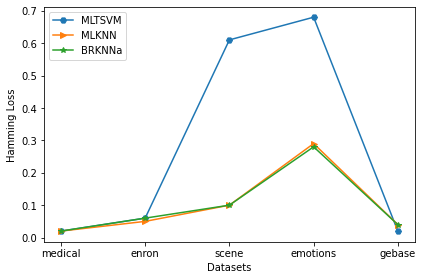

In [ ]:
import matplotlib.pyplot as plt
dataset=['medical','enron','scene','emotions','gebase']
print(hamming_loss_MLKNN)
fig, ax=plt.subplots()
ax.plot(dataset,hamming_loss_MLTSVM, label='MLTSVM',marker='H')
ax.plot(dataset,hamming_loss_MLKNN, label='MLKNN',marker='>')
ax.plot(dataset,hamming_loss_BRKNNa, label='BRKNNa',marker='*')
ax.legend(loc='upper left')
ax.set_xlabel('Datasets')
ax.set_ylabel('Hamming Loss')
plt.tight_layout()
plt.savefig('hamming loss')

##Accuracy

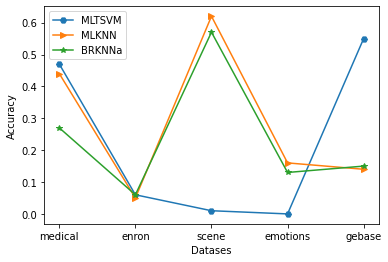

In [ ]:
#import matplotlib.pyplot as plt
fig, ax=plt.subplots()
ax.plot(dataset,accuracy_MLTSVM, label='MLTSVM',marker='H')
ax.plot(dataset,accuracy_MLKNN, label='MLKNN',marker='>')
ax.plot(dataset,accuracy_BRKNNa, label='BRKNNa',marker='*')
ax.legend(loc='upper left')
ax.set_xlabel('Datases')
ax.set_ylabel('Accuracy')
plt.savefig('Accuracy')

##Precision

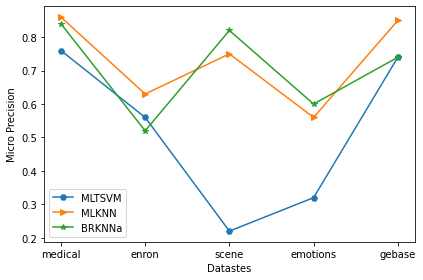

In [ ]:
fig, ax=plt.subplots()
ax.plot(dataset,precision_MLTSVM, label='MLTSVM',marker='H')
ax.plot(dataset,precision_MLKNN, label='MLKNN',marker='>')
ax.plot(dataset,precision_BRKNNa, label='BRKNNa',marker='*')
ax.legend(loc='lower left')
ax.set_xlabel('Datastes')
ax.set_ylabel('Micro Precision')
plt.tight_layout()
plt.savefig('Precision')

##Recall

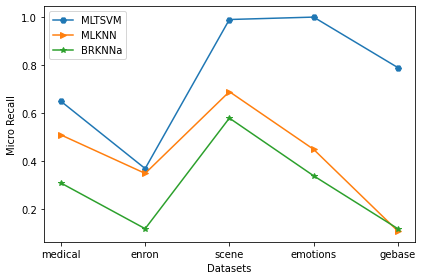

In [ ]:
fig, ax=plt.subplots()
ax.plot(dataset,recall_MLTSVM, label='MLTSVM',marker='H')
ax.plot(dataset,recall_MLKNN, label='MLKNN',marker='>')
ax.plot(dataset,recall_BRKNNa, label='BRKNNa',marker='*')
ax.legend(loc='upper left')
ax.set_xlabel('Datasets')
ax.set_ylabel('Micro Recall')
plt.tight_layout()
plt.savefig('Recall')

##F1 measure

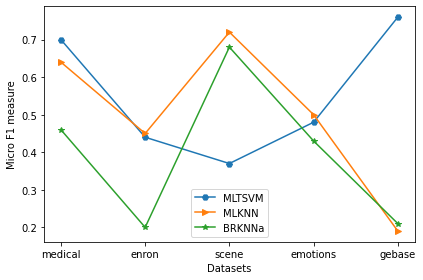

In [ ]:
#F1 measure
fig, ax=plt.subplots()
ax.plot(dataset,f1_measure_MLTSVM, label='MLTSVM',marker='H')
ax.plot(dataset,f1_measure_MLKNN, label='MLKNN',marker='>')
ax.plot(dataset,f1_measure_BRKNNa, label='BRKNNa',marker='*')
ax.legend(loc='lower center')
ax.set_xlabel('Datasets')
ax.set_ylabel('Micro F1 measure')
plt.tight_layout()
plt.savefig('f1 measure')